In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

zsh:1: no matches found: qiskit[visualization]==1.2.4
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /private/var/folders/m3/t6f0yfqx1pgdnzb65y951k8m0000gn/T/pip-req-build-6rn7luyx
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /private/var/folders/m3/t6f0yfqx1pgdnzb65y951k8m0000gn/T/pip-req-build-6rn7luyx
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae905083ec3872d7ddc6bb4001d5468f476d93f
  Preparing metadata (setup.py) 

In [2]:
%pip show qiskit
%pip show qiskit-aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /Users/mzc01-mkpark/Library/Python/3.9/lib/python/site-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime, qiskit-qasm3-import, qiskit-textbook, qiskit-transpiler-service
Note: you may need to restart the kernel to use updated packages.
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /Users/mzc01-mkpark/Library/Python/3.9/lib/python/site-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 
Note: you

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from IPython.display import display, Math
import numpy as np
from qiskit.quantum_info import Statevector

ImportError: Qiskit is installed in an invalid environment that has both Qiskit >=1.0 and an earlier version. You should create a new virtual environment, and ensure that you do not mix dependencies between Qiskit <1.0 and >=1.0. Any packages that depend on 'qiskit-terra' are not compatible with Qiskit 1.0 and will need to be updated. Qiskit unfortunately cannot enforce this requirement during environment resolution. See https://qisk.it/packaging-1-0 for more detail.

# Quantum Teleportation: q[0]의 상태값을 q[1]에 복사시키는 것
## 왜, 양자역할이론에서 복사불가정리(no-cloning theorem)에 의하여 Qubit간에 복사가 되지 않는데, 복사는 하는 효과를 낼 수 있음.

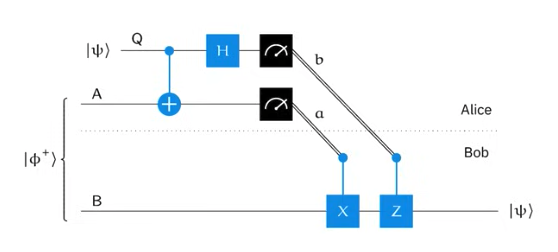

In [3]:
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.reset(qreg_q[0])
circuit.reset(qreg_q[2])
circuit.reset(qreg_q[1])

circuit.x(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.x(qreg_q[2]).c_if(creg_c[1], 1)
circuit.z(qreg_q[2]).c_if(creg_c[0], 1)
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2])

circuit.measure(qreg_q[2], creg_c[2])


NameError: name 'QuantumRegister' is not defined

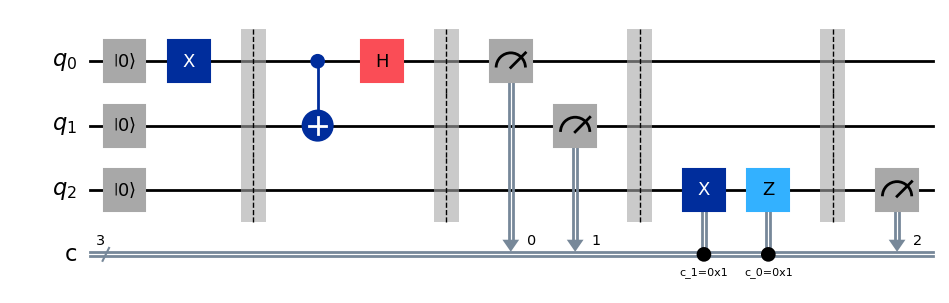

In [40]:
circuit.draw("mpl")

In [41]:
# 시뮬레이터로 실행
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(circuit, shots=1024).result()

In [42]:
creg_c[0]

Clbit(ClassicalRegister(3, 'c'), 0)

In [43]:
creg_c[1]

Clbit(ClassicalRegister(3, 'c'), 1)

Counts: {'110': 511, '111': 513}


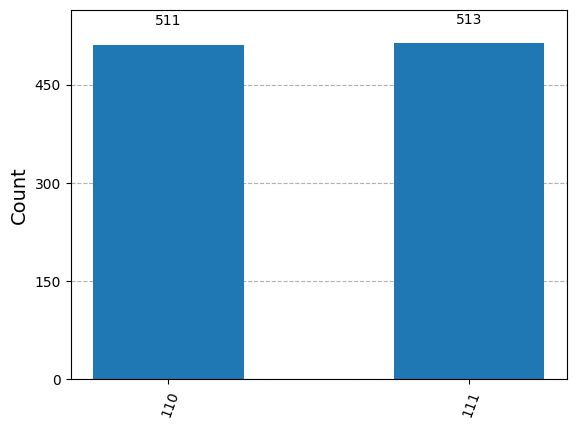

In [44]:
# 결과 출력
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts)

# 결과를 해석하는 법

# 큐빗 순서는 q[2], q[1], q[0] 순입니다. q[0] = 1 로 했으니, q[2] 가 1이 되어야 합니다.
# 위 결과 중 두번째와 "101"과 마지막 "111"의 경우  즉, 마지막 숫자가 "1", q[0]가 "1"인 경우는 반드시 첫번째 숫자는 "1"입니다. 마지막 숫자가 "0"인 경우는 무시하면 됨

In [45]:
new_counts = {}
for key, value in counts.items():
  if key.endswith('1'):
    new_counts[key] = value
  ###if
###for

print("New Counts:", new_counts)

New Counts: {'111': 513}


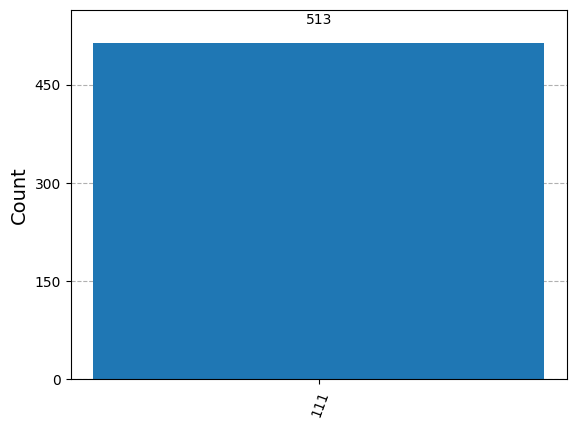

In [46]:
plot_histogram(new_counts)